<a href="https://colab.research.google.com/github/umiSirya/MachineLearning_2/blob/main/Web_Traffic_Prophet_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd
import numpy as np

from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv('/content/train_1.csv')
df


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,12.0,13.0,3.0,5.0,10.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145060,Enamorándome_de_Ramón_es.wikipedia.org_all-acc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145061,Hasta_el_último_hombre_es.wikipedia.org_all-ac...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# list first 100 values in page column
df['Page'].head(145000)

,Page
0,2NE1_zh.wikipedia.org_all-access_spider
1,2PM_zh.wikipedia.org_all-access_spider
2,3C_zh.wikipedia.org_all-access_spider
3,4minute_zh.wikipedia.org_all-access_spider
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
...,...
144995,XXx_(película)_es.wikipedia.org_all-access_spider
144996,¿Volverías_con_tu_ex?_es.wikipedia.org_all-acc...
144997,Alicia_a_través_del_espejo_(película)_es.wikip...
144998,Copa_del_Rey_de_fútbol_2016-17_es.wikipedia.or...


**EDA**

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


**Data cleaning**

In [79]:
# Reshaping the df into two columns
page_name = "¿Volverías_con_tu_ex?_es.wikipedia.org_all-access_spider" # page name ive forecasted is all access spider

page_data = df.loc[df['Page'] == page_name].drop('Page', axis=1).transpose()
df = page_data.reset_index()
df.columns = ['ds', 'y'] # ds is for the date column and y is the web traffic data
df.head()

,ds,y
0,2015-07-01,NaN
1,2015-07-02,NaN
2,2015-07-03,NaN
3,2015-07-04,NaN
4,2015-07-05,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      550 non-null    object 
 1   y       363 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [81]:
# Convert 'ds' column to datetime dtype
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       363 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


**Prophet Model**

In [82]:
m = Prophet()
m.fit(df)

future = m.make_future_dataframe(periods=30)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprkcmv0i0/vbj7x6ow.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprkcmv0i0/wbtg29bf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37993', 'data', 'file=/tmp/tmprkcmv0i0/vbj7x6ow.json', 'init=/tmp/tmprkcmv0i0/wbtg29bf.json', 'output', 'file=/tmp/tmprkcmv0i0/prophet_model8vaqs3no/prophet_model-20250114111827.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:18:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:18:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
575,2017-01-26,-10.507102,-75.482210,52.254251
576,2017-01-27,-3.629916,-70.100352,59.618484
577,2017-01-28,-16.598129,-80.553433,46.771758
578,2017-01-29,-22.142207,-84.712130,43.147099
579,2017-01-30,-1.621935,-68.227361,62.304434


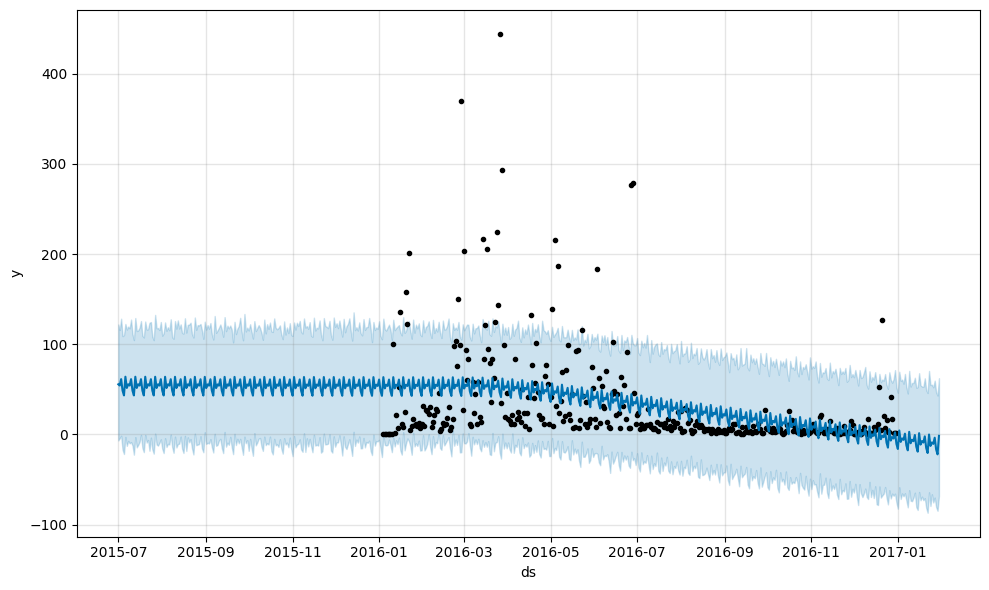

In [83]:
fig1 = m.plot(forecast)


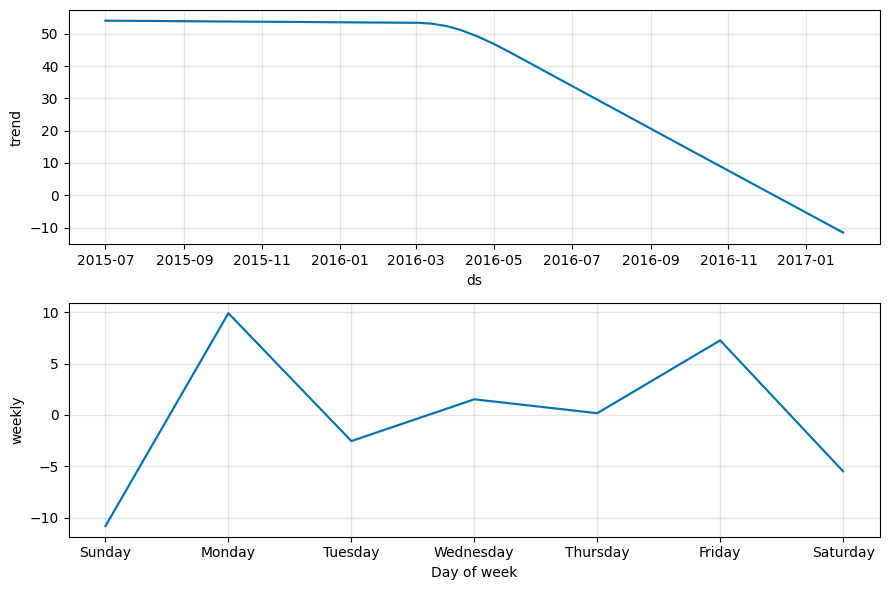

In [84]:
fig2 = m.plot_components(forecast)
